<hr style="border:2px solid gray"> </hr>



Agenda:

1. Import huge file (3 month temp-1 set)
2. Plot out whatever you want to get a feel for it 


<hr style="border:2px solid gray"> </hr>


In [69]:

# import libraries 
import os
import sys
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

os.chdir('D:\\AOT_TEMPERATURE_ONLY_DATASET\\AoT_Chicago.complete.temp1')

# df = pd.read_csv('data.csv', 
#                  parse_dates=['data.csv'], 
#                  index_col='data.csv')

# df.drop('value_raw', axis=1, inplace=True)  
# # value_hrf is what we want 

# df.index.names = ["timestamp"]

# # categorize 
# df['node_id'] = df['node_id'].astype('category')
# df['subsystem'] = df['subsystem'].astype('category')
# df['sensor'] = df['sensor'].astype('category')
# df['parameter'] = df['parameter'].astype('category')

# # Drop last row
# df.drop(index=df.index[-1], axis=0, inplace=True)

# print('Length:', len(df)) # 120 844 393  120M rows ! 

# # df is now in final state...

# print(df.head(10))

# # remember: 
# #  - reading in csv is horrible
# #  - convert this to parquet, and read going forward directly 


<hr style="border:2px solid gray"> </hr>


### Reading in parquet 3 mo file

In [2]:
import fastparquet

In [3]:

df3 = pd.read_parquet('333_tempset_1_perfect.parquet', 
                       engine='fastparquet')

# in theory this should be cleaned, in the perfect form for you and no longer need any processing


In [5]:
# len(df3)  # unbelievably fast reading it in
#           12 356 626

In [6]:
df3.head(10)

node_id subsystem   sensor    parameter  value_hrf
timestamp                                                                   
2019-01-01 00:00:00  001e06113f54  metsense  pr103j2  temperature      43.16
2019-01-01 00:00:01  001e0610ee33  metsense  pr103j2  temperature      39.56
2019-01-01 00:00:01  001e061146bc  metsense  pr103j2  temperature      37.40
2019-01-01 00:00:01  001e061146cb  metsense  pr103j2  temperature      38.48
2019-01-01 00:00:02  001e0610bc12  metsense  pr103j2  temperature      40.28
2019-01-01 00:00:02  001e0610f02f  metsense  pr103j2  temperature      39.20
2019-01-01 00:00:03  001e0610ee36  metsense  pr103j2  temperature      39.83
2019-01-01 00:00:04  001e0610f6db  metsense  pr103j2  temperature      48.65
2019-01-01 00:00:05  001e0610ee5d  metsense  pr103j2  temperature      38.30
2019-01-01 00:00:06  001e06113a24  metsense  pr103j2  temperature      40.73

In [7]:
df3.tail(10)

node_id subsystem   sensor    parameter  value_hrf
timestamp                                                                   
2019-03-31 23:59:52  001e0610f703  metsense  pr103j2  temperature      33.26
2019-03-31 23:59:53  001e0610e532  metsense  pr103j2  temperature      54.32
2019-03-31 23:59:53  001e0610e537  metsense  pr103j2  temperature      33.71
2019-03-31 23:59:53  001e06113d20  metsense  pr103j2  temperature      28.49
2019-03-31 23:59:53  001e06114fcf  metsense  pr103j2  temperature      33.71
2019-03-31 23:59:54  001e061130f4  metsense  pr103j2  temperature      36.23
2019-03-31 23:59:55  001e0610ba46  metsense  pr103j2  temperature      36.50
2019-03-31 23:59:57  001e0610ba13  metsense  pr103j2  temperature      35.78
2019-03-31 23:59:58  001e0610ee36  metsense  pr103j2  temperature      38.48
2019-03-31 23:59:59  001e06113acb  metsense  pr103j2  temperature      28.49

<hr style="border:2px solid gray"> </hr>


### Read in temp single_node single_sensor set... (all temp)

In [9]:
# first need to siphon down to a single node ! 

In [11]:
df3.sensor.value_counts()

pr103j2    12356626
Name: sensor, dtype: int64

In [13]:
len(df3.node_id.unique())

60

In [14]:
# maybe these split out by nodes, half and half ?  temp-1 is 60 node cluster ? 

In [15]:
df3.subsystem.unique()

['metsense']
Categories (1, object): ['metsense']

In [16]:
df3.sensor.unique()

['pr103j2']
Categories (1, object): ['pr103j2']

In [19]:
df3.sensor.value_counts()

pr103j2    12356626
Name: sensor, dtype: int64

In [20]:
df3.node_id.unique()

['001e06113f54', '001e0610ee33', '001e061146bc', '001e061146cb', '001e0610bc12', ..., '001e06113d20', '001e06115369', '001e0610ee61', '001e06114fcf', '001e061144cd']
Length: 60
Categories (60, object): ['001e06113f54', '001e0610ee33', '001e061146bc', '001e061146cb', ..., '001e06115369', '001e0610ee61', '001e06114fcf', '001e061144cd']

In [22]:
df3.subsystem.unique()

['metsense']
Categories (1, object): ['metsense']

In [23]:
df3.sensor.unique()

['pr103j2']
Categories (1, object): ['pr103j2']

In [24]:
df3.subsystem.value_counts()

metsense    12356626
Name: subsystem, dtype: int64

<hr style="border:2px solid gray"> </hr>


In [38]:
len(df3)  #  12 356 626  :  12M 

12356626

<hr style="border:2px solid gray"> </hr>


In [39]:
df3.head(10)

node_id subsystem   sensor    parameter  value_hrf
timestamp                                                                   
2019-01-01 00:00:00  001e06113f54  metsense  pr103j2  temperature      43.16
2019-01-01 00:00:01  001e0610ee33  metsense  pr103j2  temperature      39.56
2019-01-01 00:00:01  001e061146bc  metsense  pr103j2  temperature      37.40
2019-01-01 00:00:01  001e061146cb  metsense  pr103j2  temperature      38.48
2019-01-01 00:00:02  001e0610bc12  metsense  pr103j2  temperature      40.28
2019-01-01 00:00:02  001e0610f02f  metsense  pr103j2  temperature      39.20
2019-01-01 00:00:03  001e0610ee36  metsense  pr103j2  temperature      39.83
2019-01-01 00:00:04  001e0610f6db  metsense  pr103j2  temperature      48.65
2019-01-01 00:00:05  001e0610ee5d  metsense  pr103j2  temperature      38.30
2019-01-01 00:00:06  001e06113a24  metsense  pr103j2  temperature      40.73

In [43]:

# start small with single node_id
minidf = df3[df3['node_id']=='001e0610ee33'].copy()


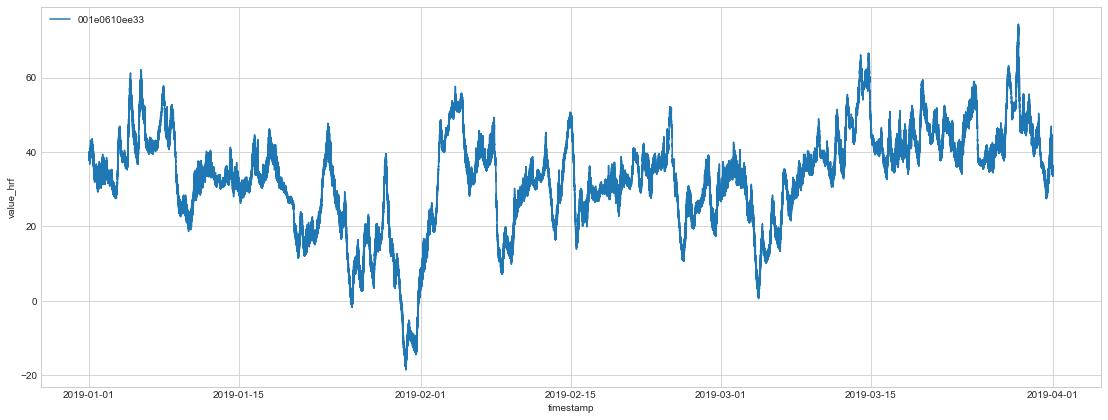

In [66]:

import seaborn as sns

plt.figure(figsize=(19, 7))

sns.lineplot(x=minidf.index, 
             y="value_hrf",
             # hue="node_id", 
             label='001e0610ee33', 
             data=minidf)

plt.legend();


<hr style="border:2px solid gray"> </hr>


> Look at ranges for anomalies, you have 60 sep unique nodes 

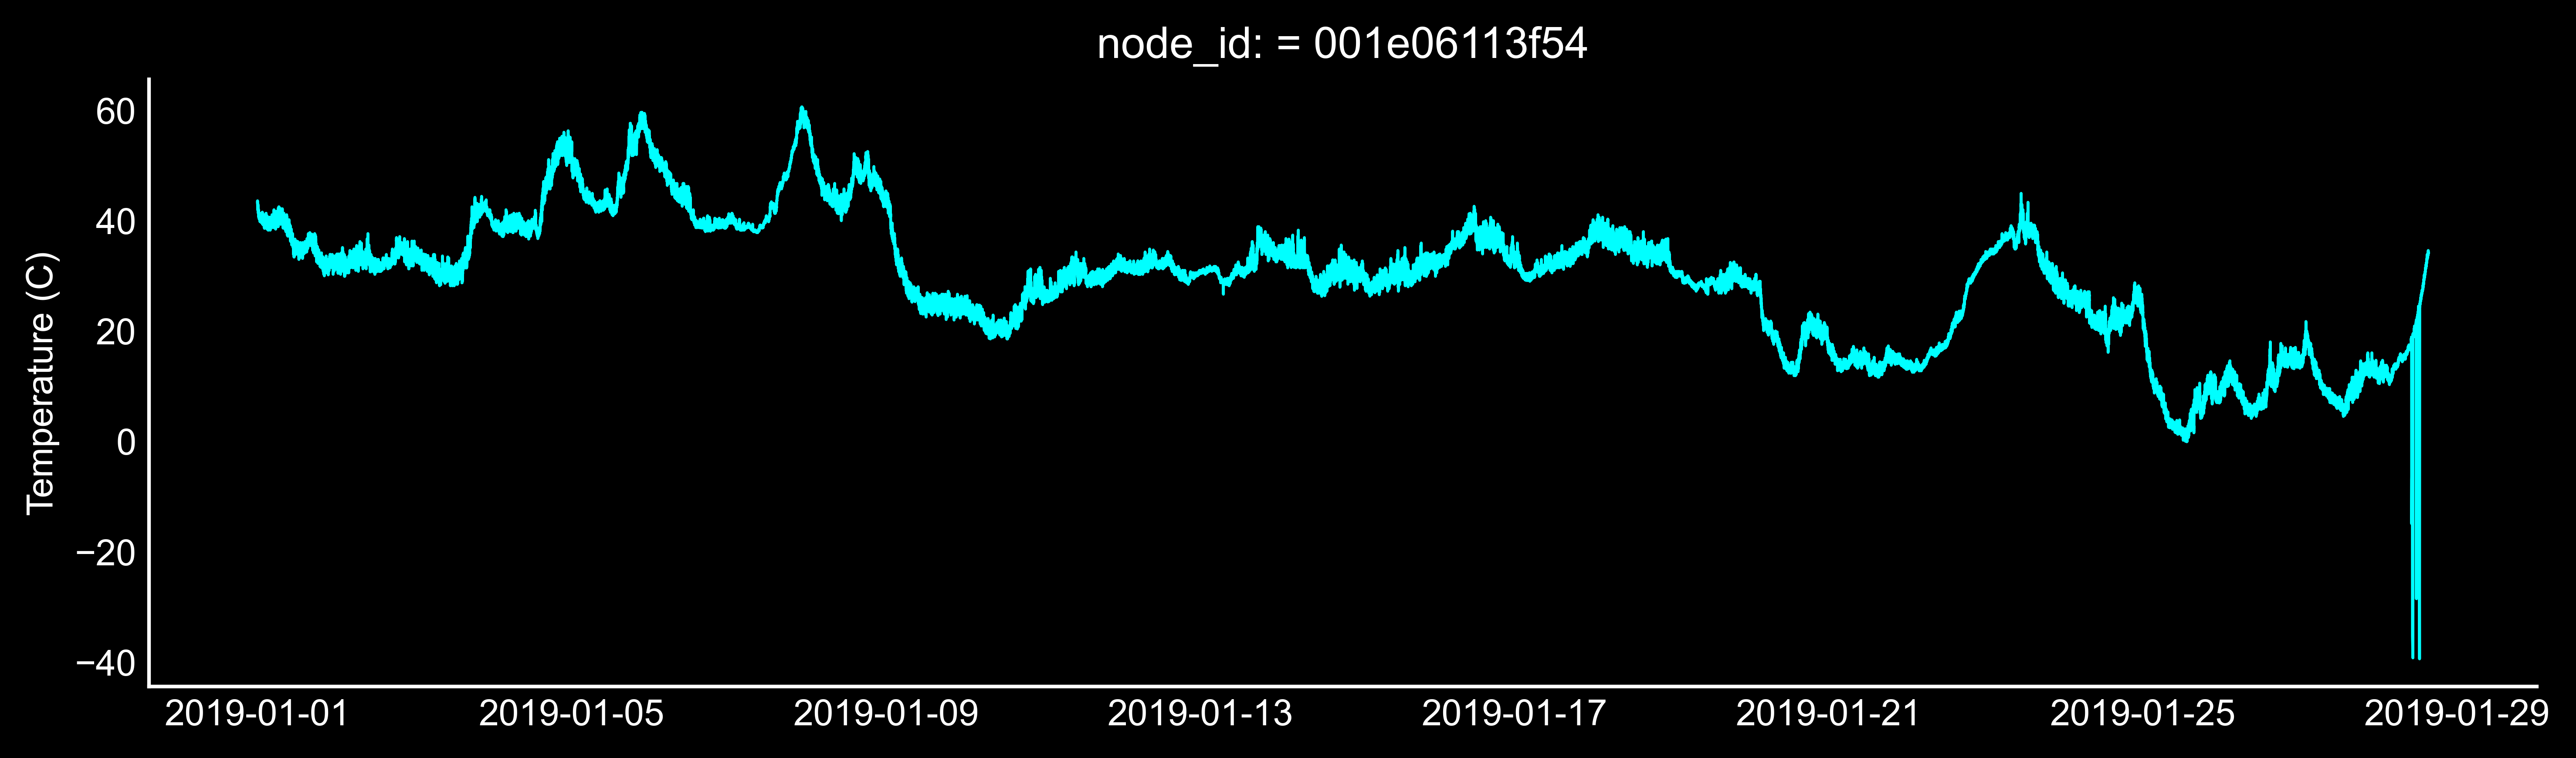

KeyboardInterrupt: 

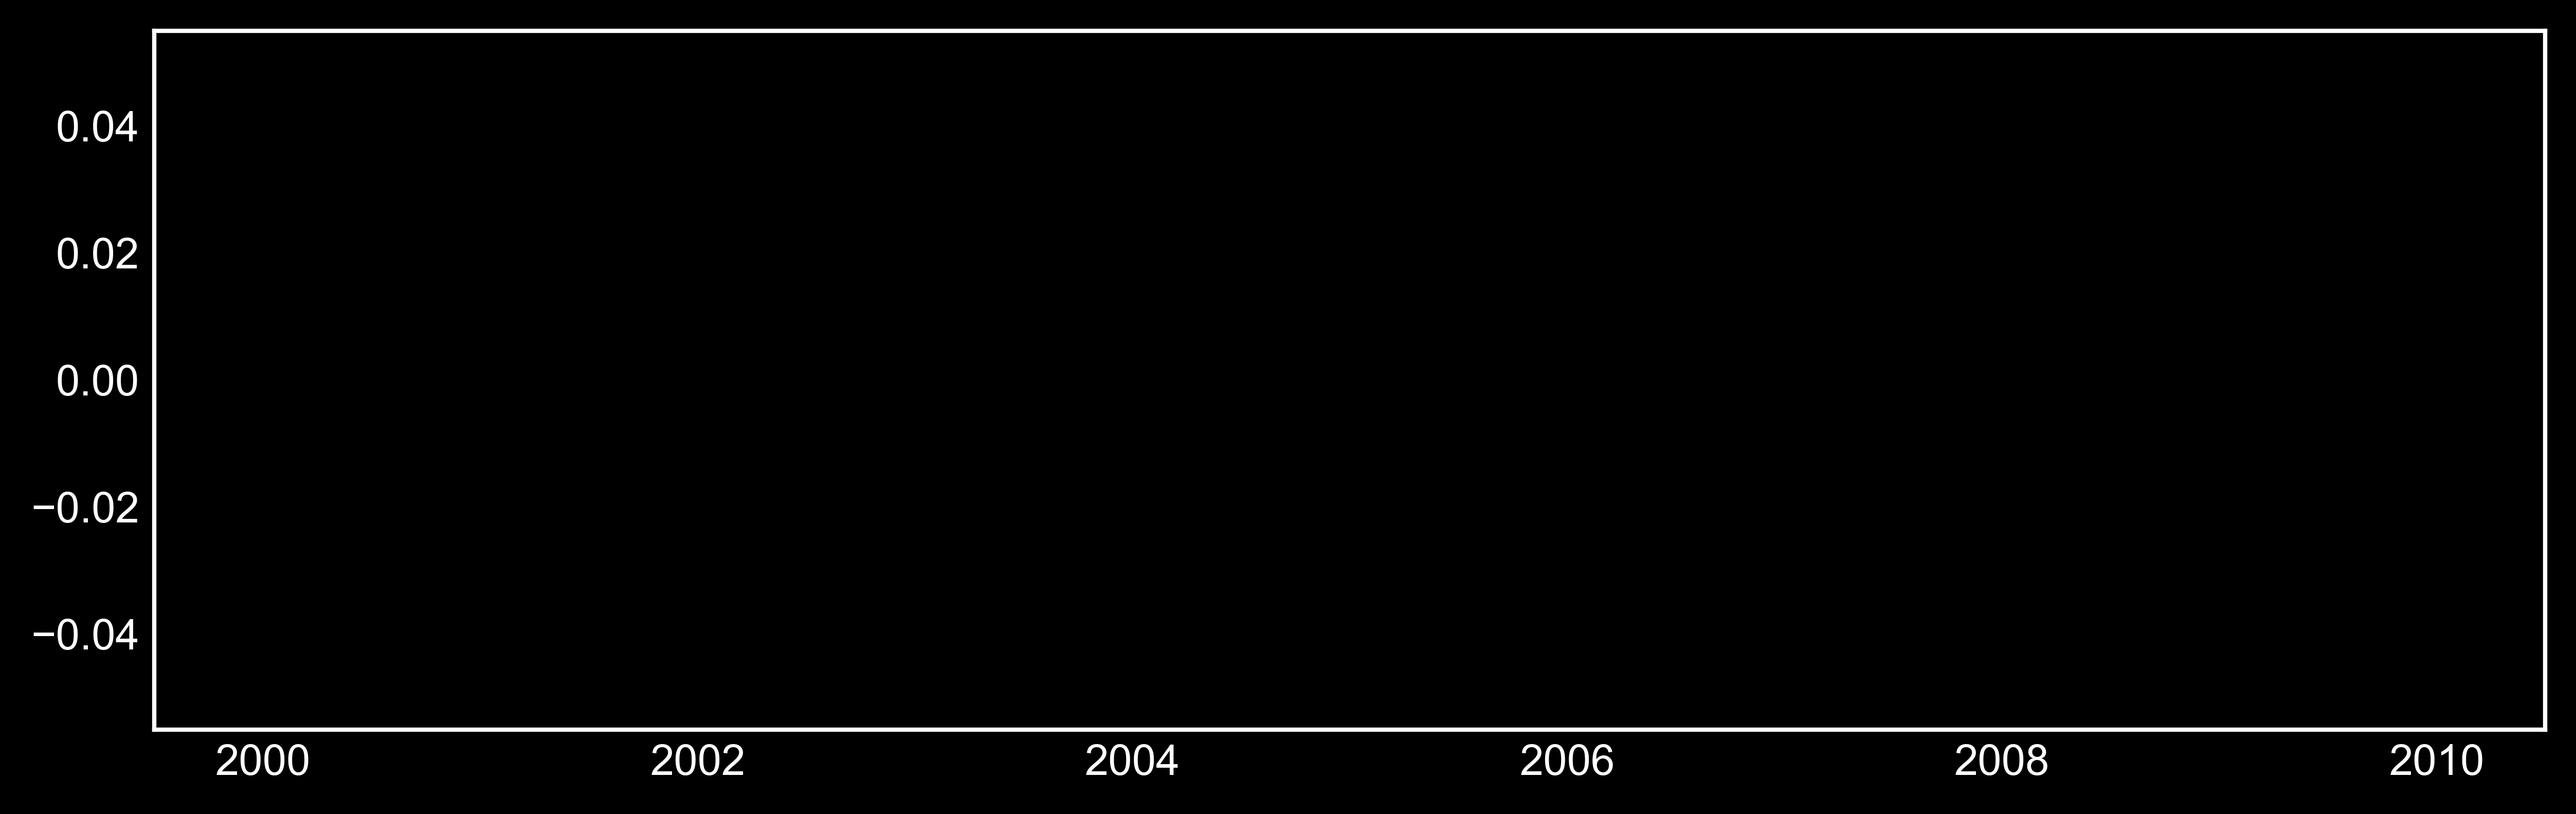

In [70]:

plt.style.use("dark_background")

small_window = list(df3.node_id.unique())

for w in small_window:
    plt.figure(figsize=(10,3),dpi = 600)
    plt.grid(False)
    sns.lineplot( x = df3[df3.node_id == w].index, 
             y=df3[df3.node_id == w].value_hrf, 
             linewidth=.8,
             color='cyan')
    sns.despine()
    plt.xlabel(''),
    plt.ylabel('Temperature (C)')
    plt.title('node_id: = {}'.format(w))
    plt.tight_layout()
    plt.show()
        

<hr style="border:2px solid gray"> </hr>


In [58]:
# showing what datashader can do

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
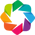

In [62]:
import pandas as pd
import numpy as np
from dask import dataframe as dd
import holoviews as hv
from holoviews.operation.datashader import datashade

hv.extension('bokeh')

def get_data():
    x = pd.date_range(start='1990-01-01', freq='1min', periods=3000000)
    y = np.sin(np.linspace(0, 8 * np.pi, len(x)))
    df = pd.DataFrame(y, index=x)
    return dd.from_pandas(df, npartitions=8)

df = get_data()
points = hv.Points((df.index, df[0]))
sin_plot = datashade(points).opts(height=400, responsive=True)

In [63]:
sin_plot

:DynamicMap   []
   :RGB   [x,y]   (R,G,B,A)

In [64]:

hv.save(sin_plot, 'graph2.html')


In [60]:
renderer = hv.renderer('bokeh')
renderer.save(sin_plot, 'graph.html')  # save it 

<hr style="border:2px solid gray"> </hr>


In [37]:
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict

In [28]:
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import datashader as ds
import datashader.transfer_functions as tf
from collections import OrderedDict

In [29]:
# Constants
np.random.seed(2)
n = 100000                               # Number of points
cols = list('abcdefg')                   # Column names of samples
start = datetime.datetime(2010, 10, 1, 0)   # Start time

# Generate a fake signal
signal = np.random.normal(0, 0.3, size=n).cumsum() + 50

# Generate many noisy samples from the signal
noise = lambda var, bias, n: np.random.normal(bias, var, n)
data = {c: signal + noise(1, 10*(np.random.random() - 0.5), n) for c in cols}

# Add some "rogue lines" that differ from the rest 
cols += ['x'] ; data['x'] = signal + np.random.normal(0, 0.02, size=n).cumsum() # Gradually diverges
cols += ['y'] ; data['y'] = signal + noise(1, 20*(np.random.random() - 0.5), n) # Much noisier
cols += ['z'] ; data['z'] = signal # No noise at all

# Pick a few samples from the first line and really blow them out
locs = np.random.choice(n, 10)
data['a'][locs] *= 2

# Create a dataframe
data['Time'] = [start + datetime.timedelta(minutes=1)*i for i in range(n)]

df = pd.DataFrame(data)
df.tail()


a          b          c          d          e          f  \
99995 -43.266888 -51.619471 -42.867714 -45.723507 -47.229012 -44.246641   
99996 -42.733578 -51.773237 -42.984615 -45.269990 -45.537120 -45.258385   
99997 -42.614768 -51.268256 -42.201864 -45.497689 -46.426903 -45.170198   
99998 -44.684017 -50.131985 -42.204521 -45.856321 -48.606589 -45.880804   
99999 -46.027779 -50.496361 -42.615223 -45.025591 -46.462669 -43.848973   

               g          x          y          z                Time  
99995 -46.509765 -54.598808 -44.922483 -48.523868 2010-12-09 10:35:00  
99996 -44.763207 -54.623914 -45.116631 -48.523325 2010-12-09 10:36:00  
99997 -45.393405 -53.837847 -44.981804 -47.741589 2010-12-09 10:37:00  
99998 -46.653791 -53.910759 -43.639239 -47.806325 2010-12-09 10:38:00  
99999 -47.319626 -54.216269 -45.546920 -48.076312 2010-12-09 10:39:00

In [30]:
df['ITime'] = pd.to_datetime(df['Time']).astype('int64')


In [32]:
# Default plot ranges:
x_range = (df.iloc[0].ITime, df.iloc[-1].ITime)
y_range = (1.2*signal.min(), 1.2*signal.max())

print("x_range: {0} y_range: {1}".format(x_range,y_range))

x_range: (1285891200000000000, 1291891140000000000) y_range: (-104.8094774985483, 100.09816883332905)


In [33]:
%%time
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=300, plot_width=900)
aggs= OrderedDict((c, cvs.line(df, 'ITime', c)) for c in cols)
img = tf.shade(aggs['a'])


Wall time: 10.3 s


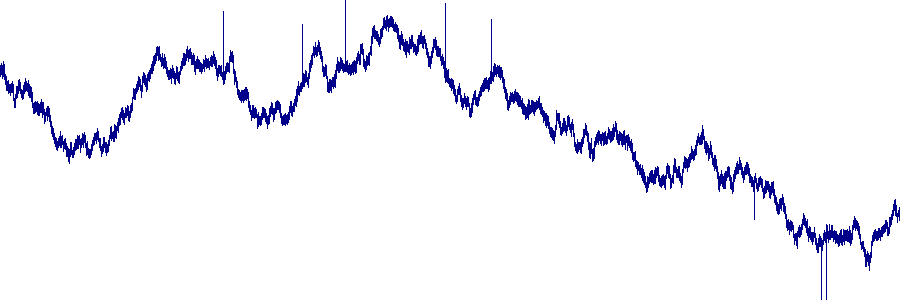

In [34]:
img

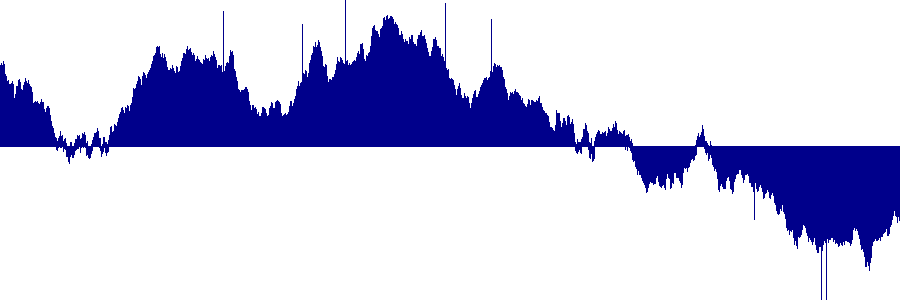

In [52]:
from datashader.utils import export_image

export_image(img, "out3", background="white", export_path=".")

In [48]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is A060-E317

 Directory of D:\AOT_TEMPERATURE_ONLY_DATASET\AoT_Chicago.complete.temp1

09/22/2021  05:21 PM    <DIR>          .
09/22/2021  05:21 PM    <DIR>          ..
09/22/2021  04:43 PM        95,019,595 333_tempset_1_perfect.parquet
09/22/2021  01:39 PM       633,748,854 aot_temperatures.csv.gz
09/22/2021  12:16 PM     8,640,467,814 aot_temp_cleaned.csv
09/22/2021  12:26 PM       889,619,399 aot_temp_cleaned.parquet
09/22/2021  12:34 PM       496,369,708 aot_temp_cleaned.parquet.gzip
09/22/2021  12:41 PM       881,523,615 aot_temp_cleaned_3months.csv
09/07/2021  01:20 PM     8,602,204,160 data.csv
09/07/2021  01:20 PM       682,117,243 data.csv.gz
08/17/2021  11:02 AM            16,268 nodes.csv
08/17/2021  11:02 AM            39,059 offsets.csv
09/22/2021  05:22 PM             4,217 out.png
08/17/2021  11:02 AM               263 provenance.csv
08/17/2021  11:02 AM             6,826 README.md
08/17/2021  11:02 AM            

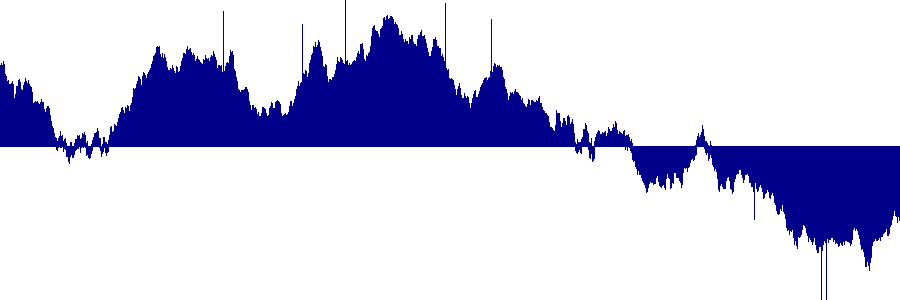

In [35]:
cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=300, plot_width=900)
agg = cvs.area(df, x='ITime', y='a')
img = tf.shade(agg)
img

In [36]:
import holoviews as hv
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

ModuleNotFoundError: No module named 'holoviews'

In [27]:

# import seaborn as sns

# plt.figure(figsize=(19, 19))

# sns.lineplot(x=df3.index, 
#              y="value_hrf",
#              hue="node_id", 
#              data=df3)
